In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# Libraries for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Libraries to build model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# Libraries for plotting
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cryptocurrencypricehistory/coin_ChainLink.csv
/kaggle/input/cryptocurrencypricehistory/coin_Cardano.csv
/kaggle/input/cryptocurrencypricehistory/coin_Solana.csv
/kaggle/input/cryptocurrencypricehistory/coin_Dogecoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Polkadot.csv
/kaggle/input/cryptocurrencypricehistory/coin_NEM.csv
/kaggle/input/cryptocurrencypricehistory/coin_XRP.csv
/kaggle/input/cryptocurrencypricehistory/coin_Ethereum.csv
/kaggle/input/cryptocurrencypricehistory/coin_Aave.csv
/kaggle/input/cryptocurrencypricehistory/coin_Bitcoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Cosmos.csv
/kaggle/input/cryptocurrencypricehistory/coin_Litecoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Uniswap.csv
/kaggle/input/cryptocurrencypricehistory/coin_EOS.csv
/kaggle/input/cryptocurrencypricehistory/coin_BinanceCoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_CryptocomCoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_USDCoin.csv
/kaggle/input/c

In [2]:
eth_df = pd.read_csv("../input/cryptocurrencypricehistory/coin_Ethereum.csv")

**Copy of original DF to analyze technical indicators**

In [3]:
eth_ti = eth_df.copy()

In [4]:
eth_ti.shape

(2160, 10)

In [5]:
eth_ti.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [6]:
print('Dates ranges from ', eth_ti['Date'][0], " To ", eth_ti['Date'][2159])

Dates ranges from  2015-08-08 23:59:59  To  2021-07-06 23:59:59


In [7]:
eth_ti.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2.160000e+03,2.160000e+03
mean,1080.500000,398.258568,365.592589,382.879899,383.910691,7.057058e+09,4.172084e+10
std,623.682612,628.082281,566.611523,599.719862,601.078766,1.064526e+10,6.909184e+10
min,1.000000,0.482988,0.420897,0.431589,0.434829,1.021280e+05,3.221363e+07
25%,540.750000,14.265225,13.190950,13.757600,13.819200,3.825102e+07,1.135576e+09
50%,1080.500000,205.124631,193.302715,198.425096,198.643691,2.148880e+09,2.070063e+10
75%,1620.250000,396.494561,375.146804,386.264935,386.435272,9.629136e+09,4.231010e+10
max,2160.000000,4362.350542,3785.848603,4174.635873,4168.701049,8.448291e+10,4.828819e+11


In [8]:
eth_ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   Date       2160 non-null   object 
 4   High       2160 non-null   float64
 5   Low        2160 non-null   float64
 6   Open       2160 non-null   float64
 7   Close      2160 non-null   float64
 8   Volume     2160 non-null   float64
 9   Marketcap  2160 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 168.9+ KB


In [9]:
eth_ti = eth_ti.reset_index()

In [10]:
eth_ti['Date'] = pd.to_datetime(eth_ti['Date'])
eth_ti.set_index('Date', inplace=True)

Text(0.5, 1.0, 'ETH Closing Price')

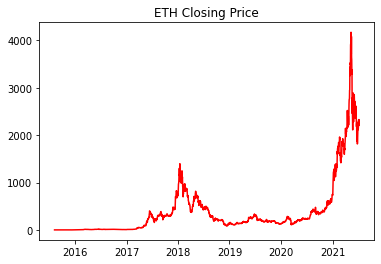

In [11]:
plt.plot(eth_ti['Close'], color='red')
plt.title('ETH Closing Price')

In [12]:
!pip install ../input/talib-tech-analysis/talib_binary-0.4.19-cp37-cp37m-manylinux1_x86_64.whl

Processing /kaggle/input/talib-tech-analysis/talib_binary-0.4.19-cp37-cp37m-manylinux1_x86_64.whl


In [13]:
import talib as ta
eth_ti['upper_band'], eth_ti['middle_band'], eth_ti['lower_band'] = ta.BBANDS(eth_ti['Close'], timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)

In [14]:
eth_ti.head()

,index,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,upper_band,middle_band,lower_band
Date,,,,,,,,,,,,,
2015-08-08 23:59:59,0,1,Ethereum,ETH,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07,NaN,NaN,NaN
2015-08-09 23:59:59,1,2,Ethereum,ETH,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07,NaN,NaN,NaN
2015-08-10 23:59:59,2,3,Ethereum,ETH,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07,NaN,NaN,NaN
2015-08-11 23:59:59,3,4,Ethereum,ETH,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07,NaN,NaN,NaN
2015-08-12 23:59:59,4,5,Ethereum,ETH,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07,1.314882,0.889794,0.464706


In [15]:
eth_ti['sma_short'] = ta.SMA(eth_ti['Close'], timeperiod=10)
eth_ti['sma_long'] = ta.SMA(eth_ti['Close'], timeperiod=50)
eth_ti['ema_short'] = ta.EMA(eth_ti['Close'], timeperiod=10)
eth_ti['ema_long'] = ta.EMA(eth_ti['Close'], timeperiod=50)

In [16]:
eth_ti['rsi'] = ta.RSI(eth_ti['Close'], timeperiod=15)
eth_ti['apo'] = ta.APO(eth_ti['Close'], fastperiod=12, slowperiod=26, matype=0)

**Exploring the technical indicators added to the etherum dataframe**

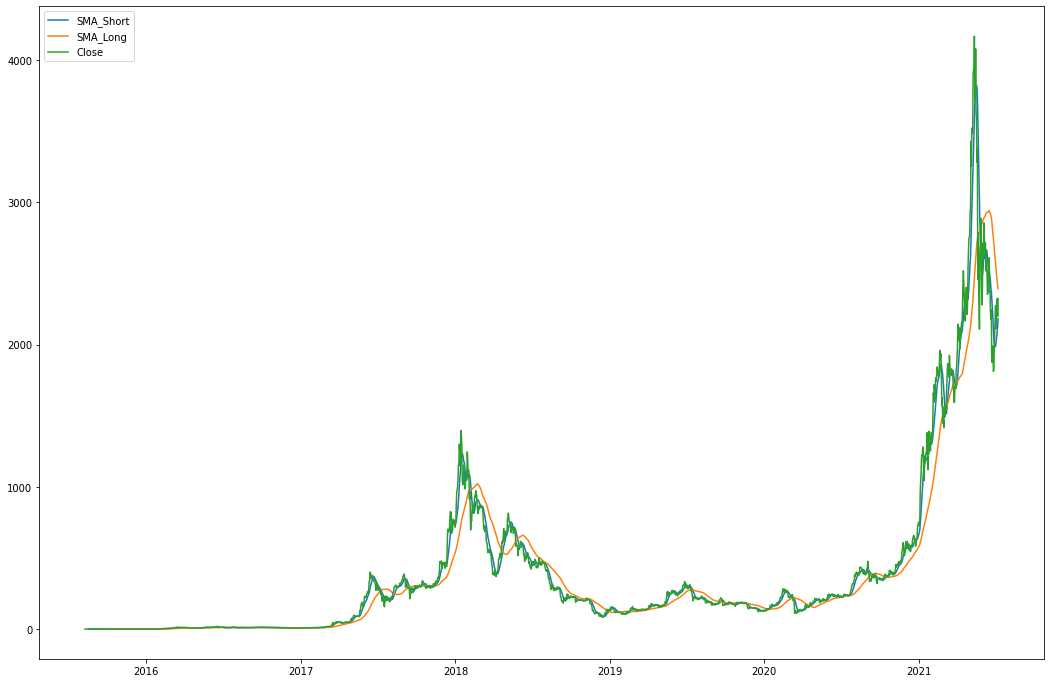

In [17]:
plt.figure(figsize=(18, 12))
plt.plot(eth_ti['sma_short'], label='SMA_Short')
plt.plot(eth_ti['sma_long'], label='SMA_Long')
plt.plot(eth_ti['Close'], label='Close')
plt.legend()

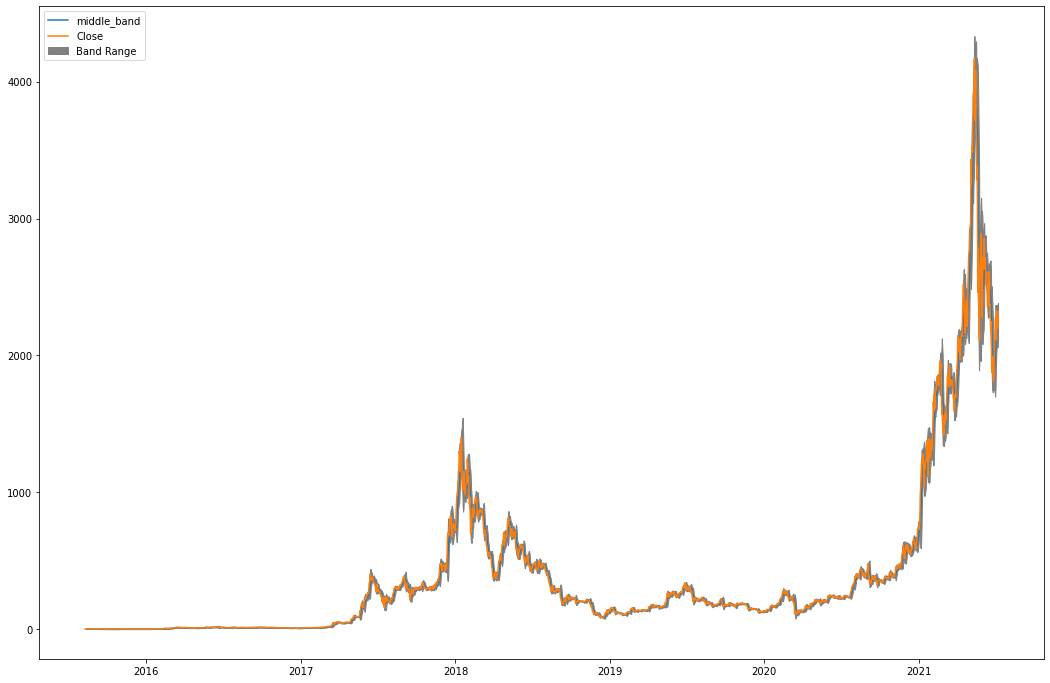

In [18]:
plt.figure(figsize=(18, 12))
plt.plot(eth_ti['middle_band'], label='middle_band')
plt.plot(eth_ti['Close'], label='Close')
plt.fill_between(eth_ti.index, eth_ti['upper_band'], eth_ti['lower_band'], color='grey', label="Band Range")
plt.legend()


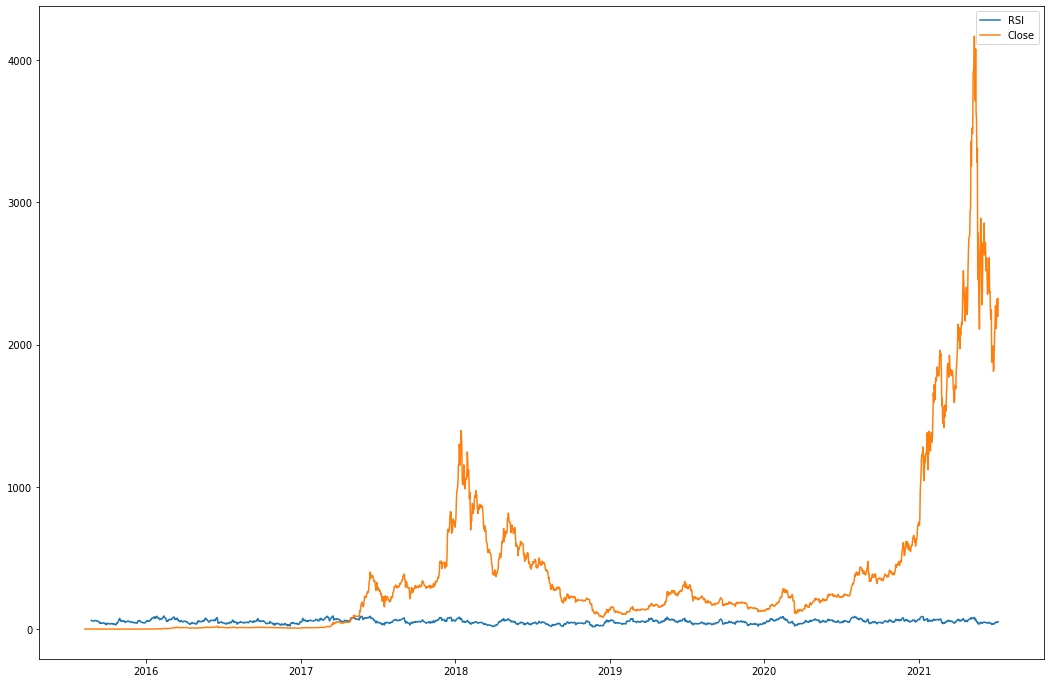

In [19]:
plt.figure(figsize=(18, 12))
plt.plot(eth_ti['rsi'], label='RSI')
plt.plot(eth_ti['Close'], label='Close')
plt.legend()

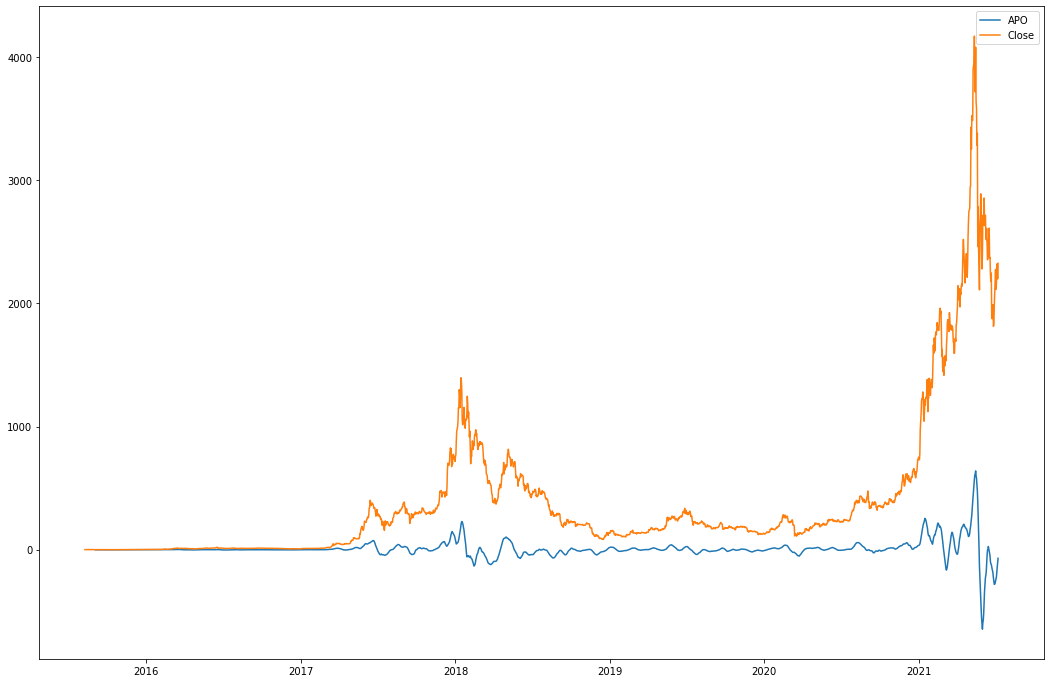

In [20]:
plt.figure(figsize=(18, 12))
plt.plot(eth_ti['apo'], label='APO')
plt.plot(eth_ti['Close'], label='Close')
plt.legend()

**Interactive Candlestick Chart**

In [21]:
import plotly.graph_objects as go

# Create candlestick
candlestick = go.Candlestick(
    x = eth_ti.index,
    open = eth_ti['Open'],
    high = eth_ti['High'],
    low = eth_ti['Low'],
    close = eth_ti['Close'])

# Create Plot
fig = go.Figure(data=[candlestick])
fig.show()

**Building LSTM Neural Network**

I will be using the original dataframe and drop Sno, Symbol, Name, Volume, and Marketcap.
The model will be predicting the time series based upon the closing price

In [22]:
new_eth = eth_df.copy()
new_eth = new_eth.drop(['SNo', 'Symbol', 'Name', 'Volume', 'Marketcap'], axis=1)
new_eth.head()

,Date,High,Low,Open,Close
0,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325
1,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897
2,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448
3,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860
4,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440


Normalizing Data to the 0-1 range

In [23]:
new_eth = new_eth.drop(['Date'], axis=1)
scaler = MinMaxScaler()
new_eth = scaler.fit_transform(np.array(new_eth).reshape(-1, 1))
print(new_eth)

[[5.45151617e-04]
 [6.73619326e-05]
 [5.43993885e-04]
 ...
 [5.03790448e-01]
 [5.03790448e-01]
 [5.32850995e-01]]


Create training and test set

In [24]:
training_set = new_eth[0:int(len(new_eth) * 0.70),:]
test_set = new_eth[int(len(new_eth) * 0.70):len(new_eth),:1]
print(training_set.shape, "Train Data Shape")
print(test_set.shape, " Test Data Shape")

(6048, 1) Train Data Shape
(2592, 1)  Test Data Shape


In [25]:
# Transform data based on requirements
def generate_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

In [26]:
time_step = 15
X_train, y_train = generate_dataset(training_set, time_step)
X_test, y_test = generate_dataset(test_set, time_step)

print(X_train.shape, ' X_Train Shape')
print(y_train.shape, ' y_train Shape')
print(X_test.shape, ' X_test Shape')
print(y_test.shape, ' y_test Shape')

(6032, 15)  X_Train Shape
(6032,)  y_train Shape
(2576, 15)  X_test Shape
(2576,)  y_test Shape


In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print(X_train.shape, ' X_Train Shape')
print(X_test.shape, ' X_test Shape')
print(type(X_train))

(6032, 15, 1)  X_Train Shape
(2576, 15, 1)  X_test Shape
<class 'numpy.ndarray'>


In [28]:
model = Sequential([
    LSTM(10, activation='relu', return_sequences = True, input_shape=(None, 1)),
    LSTM(20, activation='relu'),
    Dense(1)
])

2022-08-20 15:54:25.872837: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-20 15:54:25.882014: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-20 15:54:25.886112: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-20 15:54:25.891525: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 10)          480       
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                2480      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 2,981
Trainable params: 2,981
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, verbose=1, epochs=100)

Epoch 1/100


2022-08-20 15:54:30.150391: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


189/189 [==============================] - 22s 98ms/step - loss: 4.7274e-04 - val_loss: 0.0042
Epoch 2/100
189/189 [==============================] - 17s 89ms/step - loss: 4.6717e-05 - val_loss: 0.0039
Epoch 3/100
189/189 [==============================] - 17s 92ms/step - loss: 4.4718e-05 - val_loss: 0.0018
Epoch 4/100
189/189 [==============================] - 18s 94ms/step - loss: 4.4618e-05 - val_loss: 0.0040
Epoch 5/100
189/189 [==============================] - 18s 95ms/step - loss: 4.3488e-05 - val_loss: 0.0023
Epoch 6/100
189/189 [==============================] - 19s 98ms/step - loss: 4.2489e-05 - val_loss: 0.0016
Epoch 7/100
189/189 [==============================] - 18s 95ms/step - loss: 4.4307e-05 - val_loss: 0.0021
Epoch 8/100
189/189 [==============================] - 17s 92ms/step - loss: 4.0985e-05 - val_loss: 0.0017
Epoch 9/100
189/189 [==============================] - 18s 94ms/step - loss: 4.0410e-05 - val_loss: 0.0015
Epoch 10/100
189/189 [===========================

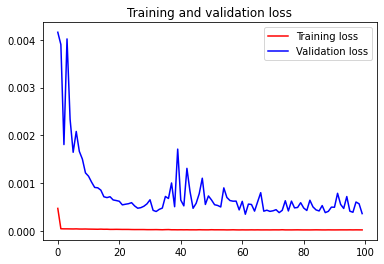

<Figure size 432x288 with 0 Axes>

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

((6032, 1), (2576, 1))

In [33]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [34]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  20.476631805721606
Train data MSE:  419.2924501070897
Train data MAE:  8.704288407247786
-------------------------------------------------------------------------------------
Test data RMSE:  83.17587263735749
Test data MSE:  6918.225788985913
Test data MAE:  35.280788882788855


In [35]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9934695018411515
Test data explained variance regression score: 0.9914860636584856


In [36]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9933101086191614
Test data R2 score: 0.9914738493022116
